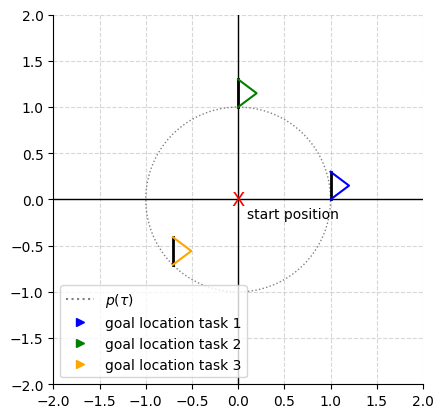

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create figure and axis
fig, ax = plt.subplots()

# Set limits for the plot
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Add a dotted unit circle
theta = np.linspace(0, 2 * np.pi, 300)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax.plot(x_circle, y_circle, linestyle=':', color='gray', linewidth=1, label="$p(\tau)$")

# Add an 'X' at the origin and label
ax.text(0, 0, 'X', fontsize=14, ha='center', va='center', color='red', label="Start Position")
ax.text(0.1, -0.2, 'start position', fontsize=10, color='black')

# Define flag positions and colors
flags = [
    ((1, 0), 'goal location task 1', 'blue'),
    ((0, 1), 'goal location task 2', 'green'),
    ((-np.sqrt(2)/2, -np.sqrt(2)/2), 'goal location task 3', 'orange'),
]

# Function to draw a flag
def draw_flag(x, y, color):
    ax.plot([x, x], [y, y + 0.3], color='black', linewidth=2)  # pole
    ax.plot([x, x + 0.2, x], [y + 0.3, y + 0.15, y], color=color)  # flag

# Draw all flags
for (x, y), _, color in flags:
    draw_flag(x, y, color)

# Create custom legend entries
# Create custom legend entries (including unit circle)
legend_elements = [
    Line2D([0], [0], linestyle=':', color='gray', label='$p(\\tau)$'),  # unit circle
    Line2D([0], [0], color='blue', marker='>', linestyle='None', label='goal location task 1'),
    Line2D([0], [0], color='green', marker='>', linestyle='None', label='goal location task 2'),
    Line2D([0], [0], color='orange', marker='>', linestyle='None', label='goal location task 3'),
]


# Add legend with best placement
ax.legend(handles=legend_elements, loc='best')

# Set aspect ratio and grid
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


## Level Set

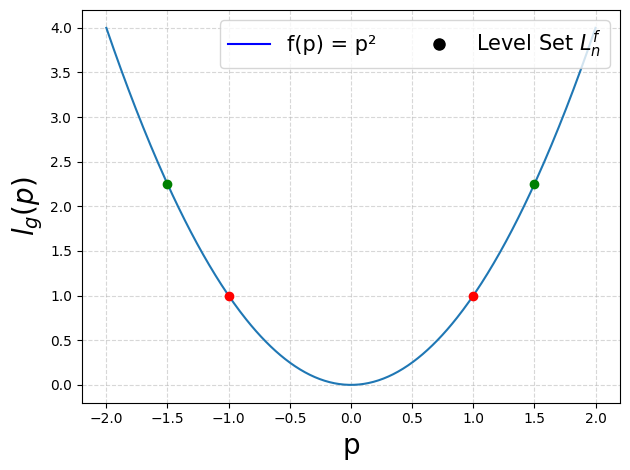

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

def add_open_loop_to_self(ax, x, y, color, loop_radius=0.3):
    # Center offset to the right of the point
    center_x = x + loop_radius
    center_y = y

    # Draw an open circular arc (not full circle)
    loop = mpatches.Arc((center_x, center_y), 2 * loop_radius, 2 * loop_radius,
                        angle=20, theta1=0, theta2=360, color=color, linewidth=2)
    ax.add_patch(loop)

    # Place arrowhead at the end of arc, pointing back to (x, y)
    end_angle = 200  # degrees
    arrow_x = center_x + loop_radius * np.cos(np.deg2rad(end_angle))
    arrow_y = center_y + loop_radius * np.sin(np.deg2rad(end_angle))

    ax.annotate("",
        xy=(x, y),  # arrow points *to* the original point
        xytext=(arrow_x, arrow_y),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=2)
    )

# Define the 1D function
x = np.linspace(-2, 2, 400)
f = x**2

# Plot the function
fig, ax = plt.subplots()
ax.plot(x, f, label='f(p) = p²')
# ax.hlines([1, 2.25], xmin=[-1, -1.5], xmax=[1,1.5], colors="black")


level_x_1 = np.array([-1, 1])
level_x_2 = np.array([-1.5, 1.5])
level_y_1 = level_x_1**2
level_y_2 = level_x_2**2

# Plot orbits
from matplotlib.lines import Line2D

# Create a dummy arrow for the legend
legend_arrow = FancyArrowPatch((0, 0), (1, 0), arrowstyle='->', color='black', mutation_scale=15, linewidth=2)

ax.plot(level_x_1, level_y_1, 'ro')
ax.plot(level_x_2, level_y_2, 'go')

# Green curved arrow
arrow_green = FancyArrowPatch(
    (level_x_2[0], level_y_2[0]), (level_x_2[1], level_y_2[1]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="green", linewidth=2,
    mutation_scale=15,  # Arrowhead size
    transform=ax.transData
)
# Grid, labels, legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
# ax.legend(loc='upper right', ncol=2, frameon=True, fontsize=15)
# Add the custom legend with the arrow
from matplotlib.lines import Line2D

legend_dot = Line2D(
    [0], [0],
    color='black',
    marker='o',
    markersize=8,
    linestyle='None',
    label='Level Set $L^f_n$'
)


ax.legend(handles=[
    Line2D([], [], color='blue', label='f(p) = p²'),
    legend_dot,
], labels=[
    'f(p) = p²',
    'Level Set $L^f_n$', 
], loc='upper right', ncol=2, frameon=True, fontsize=15)


# Set axis labels with larger font size
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('$l_g(p)$', fontsize=20)


plt.tight_layout()
plt.show()


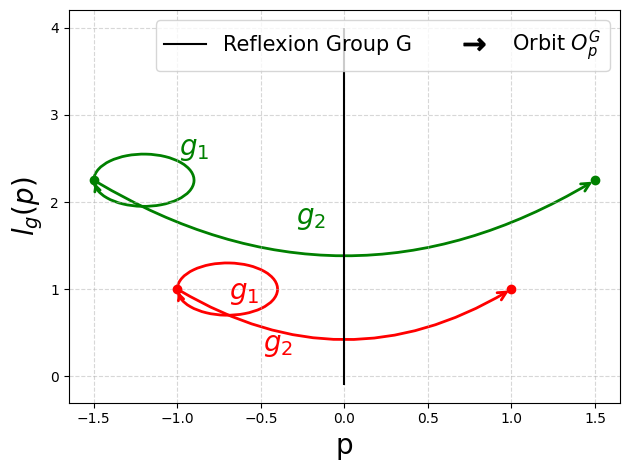

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

def add_open_loop_to_self(ax, x, y, color, loop_radius=0.3):
    # Center offset to the right of the point
    center_x = x + loop_radius
    center_y = y

    # Draw an open circular arc (not full circle)
    loop = mpatches.Arc((center_x, center_y), 2 * loop_radius, 2 * loop_radius,
                        angle=20, theta1=0, theta2=360, color=color, linewidth=2)
    ax.add_patch(loop)

    # Place arrowhead at the end of arc, pointing back to (x, y)
    end_angle = 200  # degrees
    arrow_x = center_x + loop_radius * np.cos(np.deg2rad(end_angle))
    arrow_y = center_y + loop_radius * np.sin(np.deg2rad(end_angle))

    ax.annotate("",
        xy=(x, y),  # arrow points *to* the original point
        xytext=(arrow_x, arrow_y),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=2)
    )

# Define the 1D function
x = np.linspace(-2, 2, 400)
f = x**2

# Plot the function
fig, ax = plt.subplots()
# ax.hlines([1, 2.25], xmin=[-1, -1.5], xmax=[1,1.5], colors="black")


# Highlight level sets
level_x_1 = np.array([-1, 1])
level_x_2 = np.array([-1.5, 1.5])
level_y_1 = level_x_1**2
level_y_2 = level_x_2**2

# Plot orbits
from matplotlib.lines import Line2D

# Create a dummy arrow for the legend
legend_arrow = FancyArrowPatch((0, 0), (1, 0), arrowstyle='->', color='black', mutation_scale=15, linewidth=2)

ax.plot(level_x_1, level_y_1, 'ro')
ax.plot(level_x_2, level_y_2, 'go')

# Reflection axis
ax.vlines([0], ymin=-0.1, ymax=4, colors="black", label="Reflexion Group G")

# Green curved arrow
arrow_green = FancyArrowPatch(
    (level_x_2[0], level_y_2[0]), (level_x_2[1], level_y_2[1]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="green", linewidth=2,
    mutation_scale=15,  # Arrowhead size
    transform=ax.transData
)
ax.add_patch(arrow_green)
ax.text(-0.2, level_y_2[0] - 0.6, '$g_2$', color='green', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_2[0], level_y_2[0], "green")
ax.text(level_x_2[0] + 0.6, level_y_2[0] + 0.2, '$g_1$', color='green', ha='center', va='bottom', fontsize=20)

# Red curved arrow
arrow_red = FancyArrowPatch(
    (level_x_1[0], level_y_1[0]), (level_x_1[1], level_y_1[1]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="red", linewidth=2,
    mutation_scale=15,
    transform=ax.transData
)
ax.add_patch(arrow_red)
ax.text(-0.6, level_y_1[0] - 0.2, '$g_1$', color='red', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_1[0], level_y_1[0], "red")
ax.text(level_x_1[0] + 0.6, level_y_1[0] - 0.8, '$g_2$', color='red', ha='center', va='bottom', fontsize=20)

# Grid, labels, legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
# ax.legend(loc='upper right', ncol=2, frameon=True, fontsize=15)
# Add the custom legend with the arrow
from matplotlib.lines import Line2D

# Custom legend entry for the orbit using a line with an arrow marker
legend_arrow = Line2D(
    [0], [0],
    color='black',
    linewidth=2,
    marker=r'$\rightarrow$',  # Arrow marker as a math text symbol
    markersize=15,
    label='Orbit $O^G_p$',
    linestyle='None'
)

legend_dot = Line2D(
    [0], [0],
    color='black',
    marker='o',
    markersize=8,
    linestyle='None',
    label='Level Set $L^f_n$'
)


ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Reflexion Group G'),
    legend_arrow,
], labels=[
    'Reflexion Group G',
    'Orbit $O^G_p$', 

], loc='upper right', ncol=2, frameon=True, fontsize=15)


# Set axis labels with larger font size
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('$l_g(p)$', fontsize=20)


plt.tight_layout()
plt.show()


## Plot Symmetry

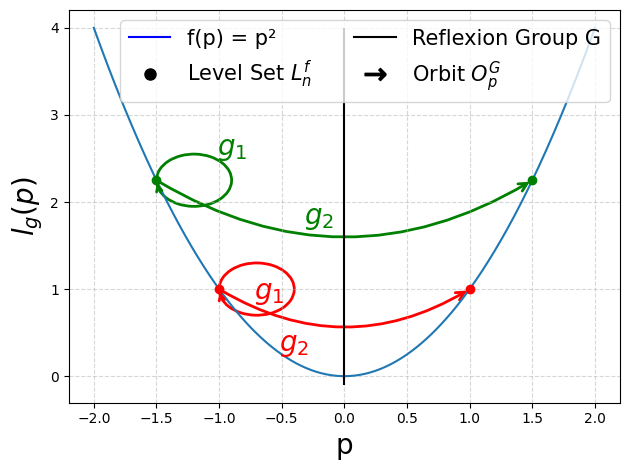

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

def add_open_loop_to_self(ax, x, y, color, loop_radius=0.3):
    # Center offset to the right of the point
    center_x = x + loop_radius
    center_y = y

    # Draw an open circular arc (not full circle)
    loop = mpatches.Arc((center_x, center_y), 2 * loop_radius, 2 * loop_radius,
                        angle=20, theta1=0, theta2=360, color=color, linewidth=2)
    ax.add_patch(loop)

    # Place arrowhead at the end of arc, pointing back to (x, y)
    end_angle = 200  # degrees
    arrow_x = center_x + loop_radius * np.cos(np.deg2rad(end_angle))
    arrow_y = center_y + loop_radius * np.sin(np.deg2rad(end_angle))

    ax.annotate("",
        xy=(x, y),  # arrow points *to* the original point
        xytext=(arrow_x, arrow_y),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=2)
    )

# Define the 1D function
x = np.linspace(-2, 2, 400)
f = x**2

# Plot the function
fig, ax = plt.subplots()
ax.plot(x, f, label='f(p) = p²')
# ax.hlines([1, 2.25], xmin=[-1, -1.5], xmax=[1,1.5], colors="black")


# Highlight level sets
level_x_1 = np.array([-1, 1])
level_x_2 = np.array([-1.5, 1.5])
level_y_1 = level_x_1**2
level_y_2 = level_x_2**2

# Plot orbits
from matplotlib.lines import Line2D

# Create a dummy arrow for the legend
legend_arrow = FancyArrowPatch((0, 0), (1, 0), arrowstyle='->', color='black', mutation_scale=15, linewidth=2)

ax.plot(level_x_1, level_y_1, 'ro')
ax.plot(level_x_2, level_y_2, 'go')

# Reflection axis
ax.vlines([0], ymin=-0.1, ymax=4, colors="black", label="Reflexion Group G")

# Green curved arrow
arrow_green = FancyArrowPatch(
    (level_x_2[0], level_y_2[0]), (level_x_2[1], level_y_2[1]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="green", linewidth=2,
    mutation_scale=15,  # Arrowhead size
    transform=ax.transData
)
ax.add_patch(arrow_green)
ax.text(-0.2, level_y_2[0] - 0.6, '$g_2$', color='green', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_2[0], level_y_2[0], "green")
ax.text(level_x_2[0] + 0.6, level_y_2[0] + 0.2, '$g_1$', color='green', ha='center', va='bottom', fontsize=20)

# Red curved arrow
arrow_red = FancyArrowPatch(
    (level_x_1[0], level_y_1[0]), (level_x_1[1], level_y_1[1]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="red", linewidth=2,
    mutation_scale=15,
    transform=ax.transData
)
ax.add_patch(arrow_red)
ax.text(-0.6, level_y_1[0] - 0.2, '$g_1$', color='red', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_1[0], level_y_1[0], "red")
ax.text(level_x_1[0] + 0.6, level_y_1[0] - 0.8, '$g_2$', color='red', ha='center', va='bottom', fontsize=20)

# Grid, labels, legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
# ax.legend(loc='upper right', ncol=2, frameon=True, fontsize=15)
# Add the custom legend with the arrow
from matplotlib.lines import Line2D

# Custom legend entry for the orbit using a line with an arrow marker
legend_arrow = Line2D(
    [0], [0],
    color='black',
    linewidth=2,
    marker=r'$\rightarrow$',  # Arrow marker as a math text symbol
    markersize=15,
    label='Orbit $O^G_p$',
    linestyle='None'
)

legend_dot = Line2D(
    [0], [0],
    color='black',
    marker='o',
    markersize=8,
    linestyle='None',
    label='Level Set $L^f_n$'
)


ax.legend(handles=[
    Line2D([], [], color='blue', label='f(p) = p²'),
    legend_dot,
    Line2D([], [], color='black', linestyle='-', label='Reflexion Group G'),
    legend_arrow,
], labels=[
    'f(p) = p²',
    'Level Set $L^f_n$', 
    'Reflexion Group G',
    'Orbit $O^G_p$', 

], loc='upper right', ncol=2, frameon=True, fontsize=15)


# Set axis labels with larger font size
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('$l_g(p)$', fontsize=20)


plt.tight_layout()
plt.show()


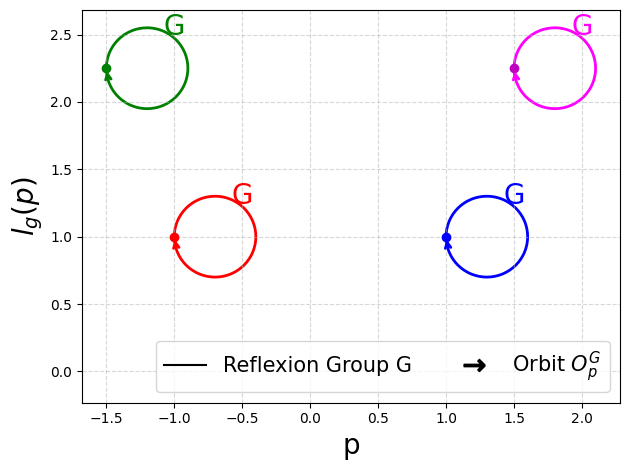

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Define the 1D function
x = np.linspace(-2, 2, 400)
f = x**2

# Plot the function
fig, ax = plt.subplots()

# Highlight level sets
level_x_1 = np.array([-1])
level_x_2 = np.array([-1.5])
level_x_3 = np.array([1])
level_x_4 = np.array([1.5])

level_y_1 = level_x_1**2
level_y_2 = level_x_2**2
level_y_3 = level_x_3**2
level_y_4 = level_x_4**2


# Plot orbits
ax.plot([], [], 'ko', label="Orbit $O^G_p$")
ax.plot(level_x_1, level_y_1, 'ro')
ax.plot(level_x_2, level_y_2, 'go')
ax.plot(level_x_3, level_y_3, 'bo')
ax.plot(level_x_4, level_y_4, 'mo')


# Reflection axis
ax.vlines([0], ymin=-0.1, ymax=-0.1, colors="black", label="Identity Group G")


add_open_loop_to_self(ax, level_x_1[0], level_y_1[0], "red")
ax.text(level_x_1[0] + 0.5, level_y_1[0] + 0.2, 'G', color='red', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_2[0], level_y_2[0], "green")
ax.text(level_x_2[0] + 0.5, level_y_2[0] + 0.2, 'G', color='green', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_3[0], level_y_3[0], "blue")
ax.text(level_x_3[0] + 0.5, level_y_3[0] + 0.2, 'G', color='blue', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_4[0], level_y_4[0], "magenta")
ax.text(level_x_4[0] + 0.5, level_y_4[0] + 0.2, 'G', color='magenta', ha='center', va='bottom', fontsize=20)



# Grid, labels, legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('$l_g(p)$', fontsize=20)

legend_arrow = Line2D(
    [0], [0],
    color='black',
    linewidth=2,
    marker=r'$\rightarrow$',  # Arrow marker as a math text symbol
    markersize=15,
    label='Orbit $O^G_p$',
    linestyle='None'
)



ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Reflexion Group G'),
    legend_arrow,
], labels=[
    'Reflexion Group G',
    'Orbit $O^G_p$', 

], loc='lower right', ncol=2, frameon=True, fontsize=15)


plt.tight_layout()
plt.show()


## Limited Symmetry

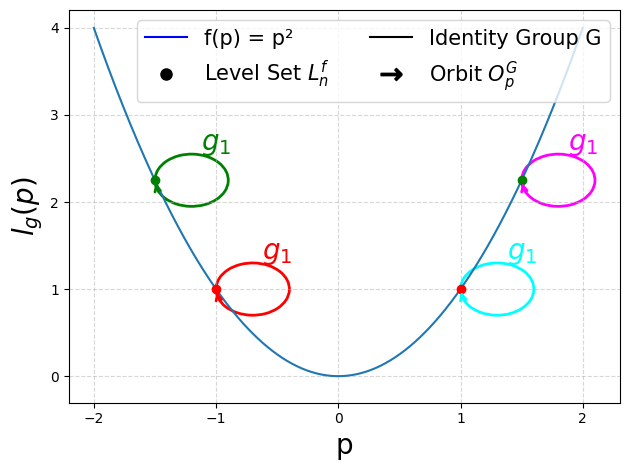

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Define the 1D function
x = np.linspace(-2, 2, 400)
f = x**2

# Plot the function
fig, ax = plt.subplots()
ax.plot(x, f, label='f(p) = p²')

# Highlight level sets
level_x_1 = np.array([-1])
level_x_2 = np.array([-1.5])
level_x_3 = np.array([1])
level_x_4 = np.array([1.5])

level_y_1 = level_x_1**2
level_y_2 = level_x_2**2
level_y_3 = level_x_3**2
level_y_4 = level_x_4**2


# Plot orbits
ax.plot([], [], 'ko', label="Orbit $O^G_p$")
ax.plot(level_x_1, level_y_1, 'ro')
ax.plot(level_x_2, level_y_2, 'go')
ax.plot(level_x_3, level_y_3, 'ro')
ax.plot(level_x_4, level_y_4, 'go')


# Reflection axis
ax.vlines([0], ymin=-0.1, ymax=-0.1, colors="black", label="Identity Group G")


add_open_loop_to_self(ax, level_x_1[0], level_y_1[0], "red")
ax.text(level_x_1[0] + 0.5, level_y_1[0] + 0.25, '$g_1$', color='red', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_2[0], level_y_2[0], "green")
ax.text(level_x_2[0] + 0.5, level_y_2[0] + 0.25, '$g_1$', color='green', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_3[0], level_y_3[0], "cyan")
ax.text(level_x_3[0] + 0.5, level_y_3[0] + 0.25, '$g_1$', color='cyan', ha='center', va='bottom', fontsize=20)

add_open_loop_to_self(ax, level_x_4[0], level_y_4[0], "magenta")
ax.text(level_x_4[0] + 0.5, level_y_4[0] + 0.25, '$g_1$', color='magenta', ha='center', va='bottom', fontsize=20)



# Grid, labels, legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('$l_g(p)$', fontsize=20)

legend_arrow = Line2D(
    [0], [0],
    color='black',
    linewidth=2,
    marker=r'$\rightarrow$',  # Arrow marker as a math text symbol
    markersize=15,
    label='Orbit $O^G_p$',
    linestyle='None'
)

legend_dot = Line2D(
    [0], [0],
    color='black',
    marker='o',
    markersize=8,
    linestyle='None',
    label='Level Set $L^f_n$'
)


ax.legend(handles=[
    Line2D([], [], color='blue', label='f(p) = p²'),
    legend_dot,
    Line2D([], [], color='black', linestyle='-', label='Identity Group G'),
    legend_arrow,
], labels=[
    'f(p) = p²',
    'Level Set $L^f_n$', 
    'Identity Group G',
    'Orbit $O^G_p$', 

], loc='upper right', ncol=2, frameon=True, fontsize=15)


plt.tight_layout()
plt.show()


## Optimal Policies

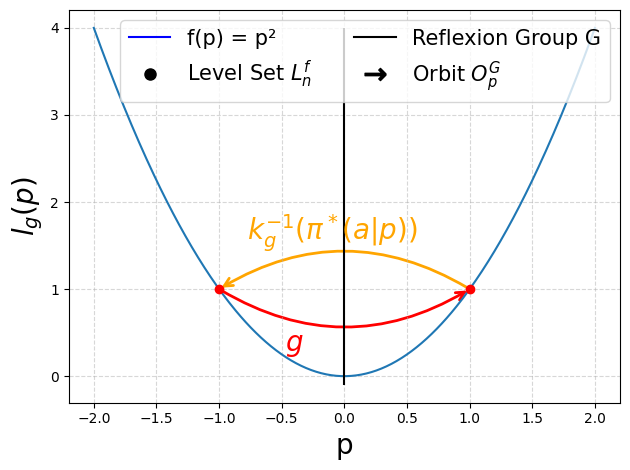

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

def add_open_loop_to_self(ax, x, y, color, loop_radius=0.3):
    # Center offset to the right of the point
    center_x = x + loop_radius
    center_y = y

    # Draw an open circular arc (not full circle)
    loop = mpatches.Arc((center_x, center_y), 2 * loop_radius, 2 * loop_radius,
                        angle=20, theta1=0, theta2=360, color=color, linewidth=2)
    ax.add_patch(loop)

    # Place arrowhead at the end of arc, pointing back to (x, y)
    end_angle = 200  # degrees
    arrow_x = center_x + loop_radius * np.cos(np.deg2rad(end_angle))
    arrow_y = center_y + loop_radius * np.sin(np.deg2rad(end_angle))

    ax.annotate("",
        xy=(x, y),  # arrow points *to* the original point
        xytext=(arrow_x, arrow_y),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=2)
    )

# Define the 1D function
x = np.linspace(-2, 2, 400)
f = x**2

# Plot the function
fig, ax = plt.subplots()
ax.plot(x, f, label='f(p) = p²')
# ax.hlines([1, 2.25], xmin=[-1, -1.5], xmax=[1,1.5], colors="black")


# Highlight level sets
level_x_1 = np.array([-1, 1])
level_x_2 = np.array([-1.5, 1.5])
level_y_1 = level_x_1**2
level_y_2 = level_x_2**2

# Plot orbits
from matplotlib.lines import Line2D

# Create a dummy arrow for the legend
legend_arrow = FancyArrowPatch((0, 0), (1, 0), arrowstyle='->', color='black', mutation_scale=15, linewidth=2)

ax.plot(level_x_1, level_y_1, 'ro')

# Reflection axis
ax.vlines([0], ymin=-0.1, ymax=4, colors="black", label="Reflexion Group G")


# Red curved arrow
arrow_red = FancyArrowPatch(
    (level_x_1[0], level_y_1[0]), (level_x_1[1], level_y_1[1]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="red", linewidth=2,
    mutation_scale=15,
    transform=ax.transData
)
ax.add_patch(arrow_red)
ax.text(level_x_1[0] + 0.6, level_y_1[0] - 0.8, '$g_2$', color='red', ha='center', va='bottom', fontsize=20)


# Add policy arrow
# Red curved arrow
arrow_orange = FancyArrowPatch(
    (level_x_1[1], level_y_1[1]), (level_x_1[0], level_y_1[0]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="orange", linewidth=2,
    mutation_scale=15,
    transform=ax.transData
)
ax.add_patch(arrow_orange)
ax.text(-0.1, level_y_1[1] + 0.4, '$k_{g_2}^{-1}(\pi^*(a|p))$', color='orange', ha='center', va='bottom', fontsize=20)

# Grid, labels, legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
# ax.legend(loc='upper right', ncol=2, frameon=True, fontsize=15)
# Add the custom legend with the arrow
from matplotlib.lines import Line2D

# Custom legend entry for the orbit using a line with an arrow marker
legend_arrow = Line2D(
    [0], [0],
    color='black',
    linewidth=2,
    marker=r'$\rightarrow$',  # Arrow marker as a math text symbol
    markersize=15,
    label='Orbit $O^G_p$',
    linestyle='None'
)

legend_dot = Line2D(
    [0], [0],
    color='black',
    marker='o',
    markersize=8,
    linestyle='None',
    label='Level Set $L^f_n$'
)


ax.legend(handles=[
    Line2D([], [], color='blue', label='f(p) = p²'),
    legend_dot,
    Line2D([], [], color='black', linestyle='-', label='Reflexion Group G'),
    legend_arrow,
], labels=[
    'f(p) = p²',
    'Level Set $L^f_n$', 
    'Reflexion Group G',
    'Orbit $O^G_p$', 

], loc='upper right', ncol=2, frameon=True, fontsize=15)


# Set axis labels with larger font size
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('$l_g(p)$', fontsize=20)


plt.tight_layout()
plt.show()


## Limited Generalization

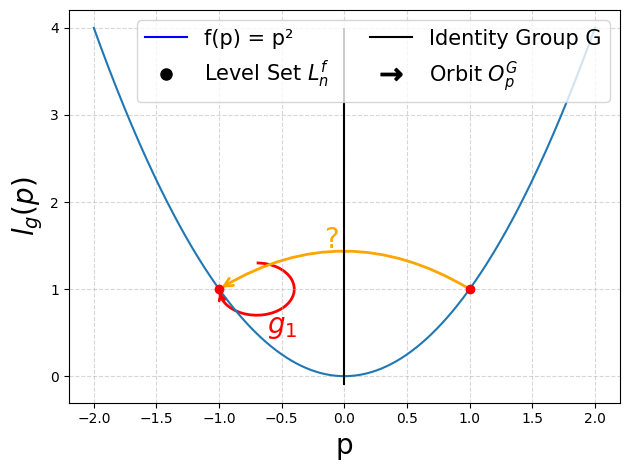

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

def add_open_loop_to_self(ax, x, y, color, loop_radius=0.3):
    # Center offset to the right of the point
    center_x = x + loop_radius
    center_y = y

    # Draw an open circular arc (not full circle)
    loop = mpatches.Arc((center_x, center_y), 2 * loop_radius, 2 * loop_radius,
                        angle=20, theta1=0, theta2=360, color=color, linewidth=2)
    ax.add_patch(loop)

    # Place arrowhead at the end of arc, pointing back to (x, y)
    end_angle = 200  # degrees
    arrow_x = center_x + loop_radius * np.cos(np.deg2rad(end_angle))
    arrow_y = center_y + loop_radius * np.sin(np.deg2rad(end_angle))

    ax.annotate("",
        xy=(x, y),  # arrow points *to* the original point
        xytext=(arrow_x, arrow_y),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=2)
    )

# Define the 1D function
x = np.linspace(-2, 2, 400)
f = x**2

# Plot the function
fig, ax = plt.subplots()
ax.plot(x, f, label='f(p) = p²')
# ax.hlines([1, 2.25], xmin=[-1, -1.5], xmax=[1,1.5], colors="black")


# Highlight level sets
level_x_1 = np.array([-1, 1])
level_x_2 = np.array([-1.5, 1.5])
level_y_1 = level_x_1**2
level_y_2 = level_x_2**2

# Plot orbits
from matplotlib.lines import Line2D

# Create a dummy arrow for the legend
legend_arrow = FancyArrowPatch((0, 0), (1, 0), arrowstyle='->', color='black', mutation_scale=15, linewidth=2)

ax.plot(level_x_1, level_y_1, 'ro')

# Reflection axis
ax.vlines([0], ymin=-0.1, ymax=4, colors="black", label="Identity Group G")

def add_open_loop_to_self(ax, x, y, color, loop_radius=0.3):
    # Center offset to the right of the point
    center_x = x + loop_radius
    center_y = y

    # Draw an open circular arc (not full circle)
    loop = mpatches.Arc((center_x, center_y), 2 * loop_radius, 2 * loop_radius,
                        angle=90, theta1=0, theta2=360, color=color, linewidth=2)
    ax.add_patch(loop)

    # Place arrowhead at the end of arc, pointing back to (x, y)
    end_angle = 200  # degrees
    arrow_x = center_x + loop_radius * np.cos(np.deg2rad(end_angle))
    arrow_y = center_y + loop_radius * np.sin(np.deg2rad(end_angle))

    ax.annotate("",
        xy=(x, y),  # arrow points *to* the original point
        xytext=(arrow_x, arrow_y),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=2)
    )
add_open_loop_to_self(ax, level_x_1[0], level_y_1[0], "red")
ax.text(level_x_1[0] + 0.5, level_y_1[0] - 0.6, '$g_1$', color='red', ha='center', va='bottom', fontsize=20)


# Add policy arrow
# Red curved arrow
arrow_orange = FancyArrowPatch(
    (level_x_1[1], level_y_1[1]), (level_x_1[0], level_y_1[0]),
    connectionstyle="arc3,rad=0.3", arrowstyle='->',
    color="orange", linewidth=2,
    mutation_scale=15,
    transform=ax.transData
)
ax.add_patch(arrow_orange)
ax.text(-0.1, level_y_1[1] + 0.4, '$?$', color='orange', ha='center', va='bottom', fontsize=20)

# Grid, labels, legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
# ax.legend(loc='upper right', ncol=2, frameon=True, fontsize=15)
# Add the custom legend with the arrow
from matplotlib.lines import Line2D

# Custom legend entry for the orbit using a line with an arrow marker
legend_arrow = Line2D(
    [0], [0],
    color='black',
    linewidth=2,
    marker=r'$\rightarrow$',  # Arrow marker as a math text symbol
    markersize=15,
    label='Orbit $O^G_p$',
    linestyle='None'
)

legend_dot = Line2D(
    [0], [0],
    color='black',
    marker='o',
    markersize=8,
    linestyle='None',
    label='Level Set $L^f_n$'
)


ax.legend(handles=[
    Line2D([], [], color='blue', label='f(p) = p²'),
    legend_dot,
    Line2D([], [], color='black', linestyle='-', label='Reflexion Group G'),
    legend_arrow,
], labels=[
    'f(p) = p²',
    'Level Set $L^f_n$', 
    'Identity Group G',
    'Orbit $O^G_p$', 

], loc='upper right', ncol=2, frameon=True, fontsize=15)


# Set axis labels with larger font size
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('$l_g(p)$', fontsize=20)


plt.tight_layout()
plt.show()
